# Overlap of krill fishing and the krill-carbon zone typology
- Catch distribution spatio-temporal
- Harvesting distribution in each category
- Number of krill caught in each category
- Map the overlap

In [262]:
# import libraries
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [263]:
# To be change with local directory of the data (file too heavy to be on git)
import os
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration')
#os.chdir('./Key_Areas_krill_carbon_sequestration/outputs_formated_data/')

# Load data

In [264]:
zones = pd.read_csv('./output_results/zones_krill_carbon.csv').dropna(subset=['Zone_type'])
zones #1762  

,latitude,longitude,label_grid,mean_seq_time,krill_adult_log,Upper_tiertile_seq,Upper_tiertile_krill,Zone_type
0,-75,-179,0.0,646.910548,1.08086,1.0,0.0,1.0
1,-75,-177,0.0,601.882341,1.38079,1.0,0.0,1.0
2,-75,-175,0.0,655.238074,1.51197,1.0,0.0,1.0
3,-75,-173,0.0,641.075711,1.53273,1.0,0.0,1.0
4,-75,-171,0.0,620.753036,1.70495,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...
2642,-47,65,0.0,298.907285,0.47365,0.0,0.0,0.0
2643,-47,67,0.0,45.645605,0.63506,0.0,0.0,0.0
2644,-47,69,0.0,44.367955,0.48378,0.0,0.0,0.0
2645,-47,71,0.0,88.203798,0.31010,0.0,0.0,0.0


In [265]:
catch = xr.open_dataset('./outputs_formated_data/Krill_catch_array_final_all.nc')
# catch = catch.to_dataframe().reset_index().drop(['variable'], axis =1) # 940 rows × 3 columns
# catch = catch.dropna()
# catch.set_index(['latitude', 'longitude'], inplace = True)
catch

<xarray.Dataset>
Dimensions:                   (latitude: 10, longitude: 180)
Coordinates:
  * latitude                  (latitude) int32 -69 -67 -65 -63 ... -55 -53 -51
  * longitude                 (longitude) int32 -179 -177 -175 ... 175 177 179
Data variables:
    krill_greenweight_kg      (latitude, longitude) float64 ...
    krill_catch_density       (latitude, longitude) float64 ...
    krill_greenweight_kg_log  (latitude, longitude) float64 ...
    krill_catch_density_log   (latitude, longitude) float64 ...

In [266]:
# save xarray of the temporal average over the three periods
catch_period1 = xr.open_dataset('./outputs_formated_data/Krill_catch_array_final_1.nc')
catch_period2 = xr.open_dataset('./outputs_formated_data/Krill_catch_array_final_2.nc')
catch_period3 = xr.open_dataset('./outputs_formated_data/Krill_catch_array_final_3.nc')

# Maps the overlap between the Zones types and fishing grounds

In [267]:
# load the Zones types as xarray
zones_array = xr.open_dataset('./output_results/zones_krill_carbon.nc').to_array()
# zones_array = zones_array.sel(latitude=zones_array.latitude[zones_array.latitude < -50])
lat_mask = zones_array.latitude < -50
lat_mask = lat_mask.broadcast_like(zones_array)
zones_array = zones_array.where(lat_mask, drop=True)
zones_array

<xarray.DataArray (variable: 1, latitude: 13, longitude: 180)>
array([[[ 1.,  1.,  1., ...,  2.,  3., nan],
        [ 1.,  3.,  3., ...,  3.,  3., nan],
        [ 3.,  3.,  0., ...,  3.,  1., nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * latitude   (latitude) int32 -75 -73 -71 -69 -67 -65 ... -59 -57 -55 -53 -51
  * longitude  (longitude) int32 -179 -177 -175 -173 -171 ... 173 175 177 179
  * variable   (variable) object '__xarray_dataarray_variable__'

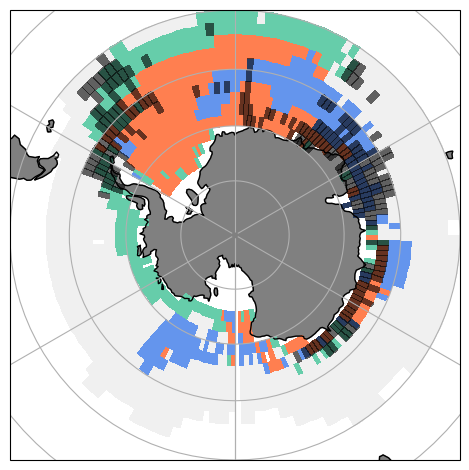

In [268]:
map_proj = ccrs.SouthPolarStereo()

p = zones_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['#f0f0f0', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    alpha = 1
) 

p2 = catch['krill_greenweight_kg_log'].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = 'black', #['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], #  ,#orangered', 
    alpha = 0.6
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
# cb = plt.colorbar(p2, label = 'Fishing density', shrink = 0.8)
# plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')
plt.tight_layout()
plt.savefig('./figures/p_overlap_zone_fishing.png', bbox_inches='tight', dpi=300)

plt.show(p2)

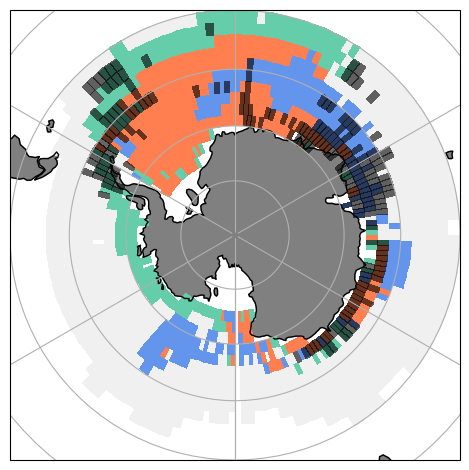

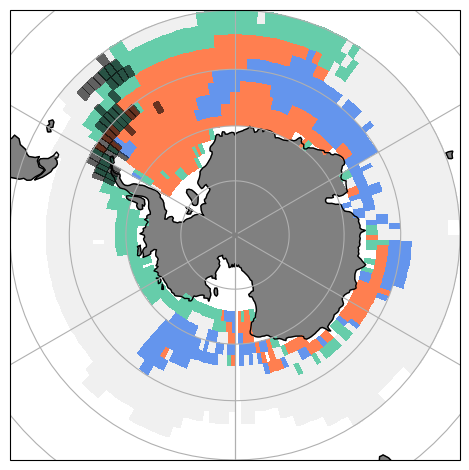

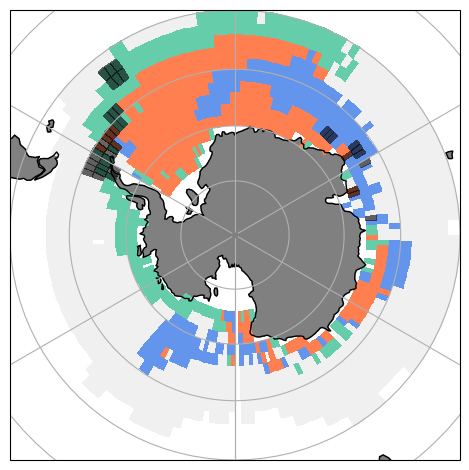

In [269]:
# Map Period 1 overlap

map_proj = ccrs.SouthPolarStereo()

p = zones_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['#f0f0f0', 'cornflowerblue', 'mediumaquamarine', 'coral']
) 

p2 = catch_period1['krill_greenweight_kg_log'].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = 'black', #['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], # 'black' ,#orangered', 
    alpha = 0.6
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')
plt.tight_layout()
plt.savefig('./figures/p_overlap_zone_fishingP1.png', bbox_inches='tight', dpi=300)

plt.show(p2)

# MMap Period 2 overlap

map_proj = ccrs.SouthPolarStereo()

p = zones_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['#f0f0f0', 'cornflowerblue', 'mediumaquamarine', 'coral']
) 

p2 = catch_period2['krill_greenweight_kg_log'].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = 'black', #['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], # 'black' ,#orangered', 
    alpha = 0.6
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')
plt.tight_layout()
plt.savefig('./figures/p_overlap_zone_fishingP2.png', bbox_inches='tight', dpi=300)

plt.show(p2)

# Map Period 3 overlap

map_proj = ccrs.SouthPolarStereo()

p = zones_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors =  ['#f0f0f0', 'cornflowerblue', 'mediumaquamarine', 'coral']
) 

p2 = catch_period3['krill_greenweight_kg_log'].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    #color ='orange', # check the grid
    levels=[1, 2, 3, 4],
    colors = 'black', #['white', 'cornflowerblue', 'mediumaquamarine', 'coral'], # 'black' ,#orangered', 
    alpha = 0.6
)

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'overlap', shrink = 0.8)
#plt.legend()
#plt.title('Spatial overlap of the upper 1/3 quantile of the krill abundance, \n the time of carbon sequestration and the 2/3 upper \n quantile of the number of krill catch')
plt.title('')
plt.tight_layout()
plt.savefig('./figures/p_overlap_zone_fishingP3.png', bbox_inches='tight', dpi=300)

plt.show(p2)

# Fishing in the different zone types: 
### how much krill is caught in each area type and what is the distribution of catch accross the krill and sequestration time distributions ?

In [276]:
catch

<xarray.Dataset>
Dimensions:                   (latitude: 10, longitude: 180)
Coordinates:
  * latitude                  (latitude) int32 -69 -67 -65 -63 ... -55 -53 -51
  * longitude                 (longitude) int32 -179 -177 -175 ... 175 177 179
Data variables:
    krill_greenweight_kg      (latitude, longitude) float64 ...
    krill_catch_density       (latitude, longitude) float64 ...
    krill_greenweight_kg_log  (latitude, longitude) float64 ...
    krill_catch_density_log   (latitude, longitude) float64 ...

In [278]:
catch_df = catch[['krill_greenweight_kg_log', 'krill_greenweight_kg']].to_dataframe().dropna().reset_index()
zones_catch = pd.merge(zones, catch_df, how='left').set_index(['latitude', 'longitude'])
zones_catch['krill_greenweight_kg_log'] = zones_catch['krill_greenweight_kg_log'].fillna(0)
zones_catch['krill_greenweight_kg'] = zones_catch['krill_greenweight_kg'].fillna(0)
zones_catch

label_grid  mean_seq_time  krill_adult_log  \
latitude longitude                                               
-75      -179              0.0     646.910548          1.08086   
         -177              0.0     601.882341          1.38079   
         -175              0.0     655.238074          1.51197   
         -173              0.0     641.075711          1.53273   
         -171              0.0     620.753036          1.70495   
...                        ...            ...              ...   
-47       65               0.0     298.907285          0.47365   
          67               0.0      45.645605          0.63506   
          69               0.0      44.367955          0.48378   
          71               0.0      88.203798          0.31010   
          73               0.0     281.247284          0.05749   

                    Upper_tiertile_seq  Upper_tiertile_krill  Zone_type  \
latitude longitude                                                        
-75      -179                      1.0                   0.0        1.0   
         -177                      1.0                   0.0        1.0   
         -175                      1.0                   0.0        1.0   
         -173                      1.0                   0.0        1.0   
         -171                      1.0                   1.0        3.0   
...                                ...                   ...        ...   
-47       65                       0.0                   0.0        0.0   
          67                       0.0                   0.0        0.0   
          69                       0.0                   0.0        0.0   
          71                       0.0                   0.0        0.0   
          73                       0.0                   0.0        0.0   

                    krill_greenweight_kg_log  krill_greenweight_kg  
latitude longitude                                                  
-75      -179                            0.0                   0.0  
         -177                            0.0                   0.0  
         -175                            0.0                   0.0  
         -173                            0.0                   0.0  
         -171                            0.0                   0.0  
...                                      ...                   ...  
-47       65                             0.0                   0.0  
          67                             0.0                   0.0  
          69                             0.0                   0.0  
          71                             0.0                   0.0  
          73                             0.0                   0.0  

[1762 rows x 8 columns]

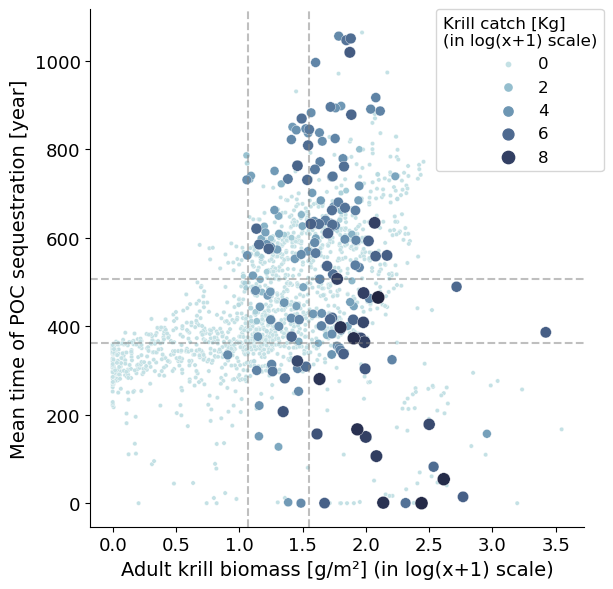

In [279]:
g=sns.relplot(x="krill_adult_log", y="mean_seq_time", 
            data=zones_catch.sort_values(by=['krill_greenweight_kg_log']),
            hue='krill_greenweight_kg_log', 
            size = 'krill_greenweight_kg_log',
            palette = sns.cubehelix_palette(rot=-.2, as_cmap=True),
           sizes = (10,90),
           label='', legend=True,
              height=6, aspect = 0.8)


# # Step 1: Get all legend entries (handles + labels)
# handles, labels = g._legend.legendHandles, [t.get_text() for t in g._legend.texts]

# # Step 2: Keep only the size legend entries
# # Find where size legend starts (after all Zone_type labels)
# size_start = labels.index("krill_catch_density_log")

# # Step 3: Keep only the size-related entries
# new_handles = handles[size_start + 1:]  # skip the variable name
# new_labels = labels[size_start + 1:]    # skip the variable name


# # Step 4: Remove existing legend, and add a new one with only size info
g._legend.remove()
g.ax.legend(title="Krill catch [Kg] \n(in log(x+1) scale)", 
            bbox_to_anchor=(0.7, 1), borderaxespad=0., title_fontsize=12, fontsize=12)


plt.axvline(x=1.070907, alpha = 0.5, color='grey', linestyle='--')
plt.axvline(x=1.548244, alpha = 0.5, color='grey', linestyle='--')

plt.axhline(y=361.922103, alpha = 0.5, color='grey', linestyle='--')
plt.axhline(y=507.647916, alpha = 0.5, color='grey', linestyle='--')

plt.xlabel('Adult krill biomass [g/m²] (in log(x+1) scale)', fontsize = 14)
plt.ylabel('Mean time of POC sequestration [year]', fontsize = 14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# plt.text(3.8, 200, '--- :  1/3 quantiles')

plt.tight_layout()
# plt.savefig('./figures/biplot_fishing.png',bbox_inches='tight', dpi=300)

plt.show()

In [280]:
zones_catch

label_grid  mean_seq_time  krill_adult_log  \
latitude longitude                                               
-75      -179              0.0     646.910548          1.08086   
         -177              0.0     601.882341          1.38079   
         -175              0.0     655.238074          1.51197   
         -173              0.0     641.075711          1.53273   
         -171              0.0     620.753036          1.70495   
...                        ...            ...              ...   
-47       65               0.0     298.907285          0.47365   
          67               0.0      45.645605          0.63506   
          69               0.0      44.367955          0.48378   
          71               0.0      88.203798          0.31010   
          73               0.0     281.247284          0.05749   

                    Upper_tiertile_seq  Upper_tiertile_krill  Zone_type  \
latitude longitude                                                        
-75      -179                      1.0                   0.0        1.0   
         -177                      1.0                   0.0        1.0   
         -175                      1.0                   0.0        1.0   
         -173                      1.0                   0.0        1.0   
         -171                      1.0                   1.0        3.0   
...                                ...                   ...        ...   
-47       65                       0.0                   0.0        0.0   
          67                       0.0                   0.0        0.0   
          69                       0.0                   0.0        0.0   
          71                       0.0                   0.0        0.0   
          73                       0.0                   0.0        0.0   

                    krill_greenweight_kg_log  krill_greenweight_kg  
latitude longitude                                                  
-75      -179                            0.0                   0.0  
         -177                            0.0                   0.0  
         -175                            0.0                   0.0  
         -173                            0.0                   0.0  
         -171                            0.0                   0.0  
...                                      ...                   ...  
-47       65                             0.0                   0.0  
          67                             0.0                   0.0  
          69                             0.0                   0.0  
          71                             0.0                   0.0  
          73                             0.0                   0.0  

[1762 rows x 8 columns]

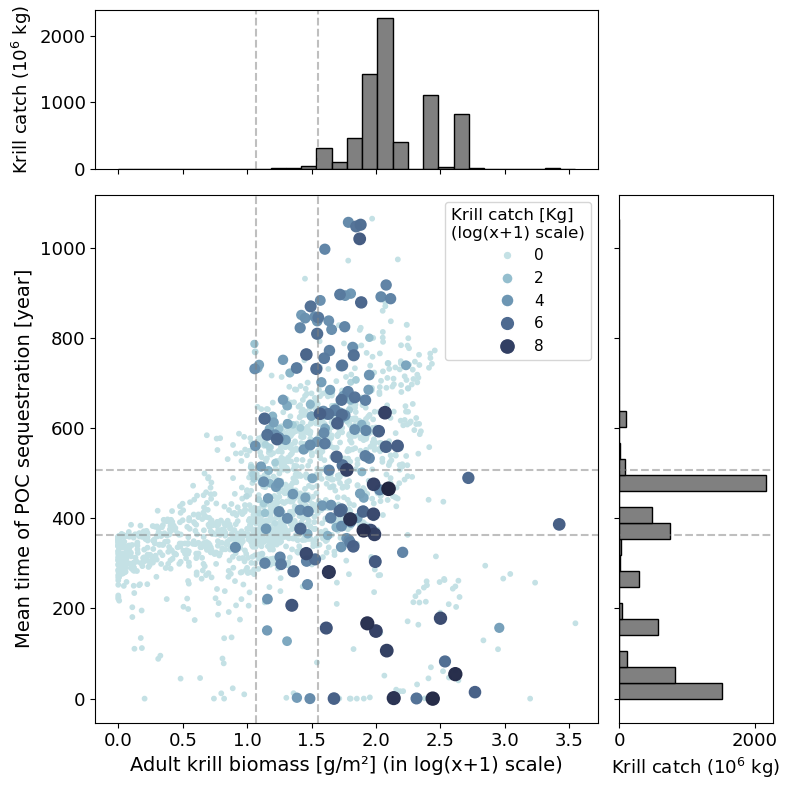

In [333]:
# Data prep
df = zones_catch.sort_values(by=['krill_greenweight_kg_log']).copy()
x = df["krill_adult_log"]
y = df["mean_seq_time"]
weights = df["krill_greenweight_kg"] / 1e6  # to plot in millions of kg

sizes = 10 + 80 * ((df['krill_greenweight_kg_log'] - df['krill_greenweight_kg_log'].min()) /
                   (df['krill_greenweight_kg_log'].max() - df['krill_greenweight_kg_log'].min()))

colors = df["krill_greenweight_kg_log"]

# Layout: Joint + Marginals
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4)
ax_joint = fig.add_subplot(gs[1:4, 0:3])
ax_marg_x = fig.add_subplot(gs[0, 0:3], sharex=ax_joint)
ax_marg_y = fig.add_subplot(gs[1:4, 3], sharey=ax_joint)

# Joint scatter plot
sc = ax_joint.scatter(x, y, c=colors, s=sizes, cmap=sns.cubehelix_palette(rot=-.2, as_cmap=True), alpha=0.99)

ax_joint.set_xlabel("Adult krill biomass [g/m²] (in log(x+1) scale)", fontsize=14)
ax_joint.set_ylabel("Mean time of POC sequestration [year]", fontsize=14)

ax_joint.axvline(x=1.070907, alpha = 0.5, color='grey', linestyle='--')
ax_joint.axvline(x=1.548244, alpha = 0.5, color='grey', linestyle='--')

ax_joint.axhline(y=361.922103, alpha = 0.5, color='grey', linestyle='--')
ax_joint.axhline(y=507.647916, alpha = 0.5, color='grey', linestyle='--')

ax_joint.tick_params(axis='both', labelsize=13)

# Marginal histogram on x-axis: weighted by krill catch
ax_marg_x.hist(x, bins=30, weights=weights, color="gray", edgecolor='black')
ax_marg_x.set_ylabel('Krill catch ($10^6$ kg)', fontsize=13)
ax_marg_x.tick_params(labelbottom=False)

ax_marg_x.axvline(x=1.070907, alpha = 0.5, color='grey', linestyle='--')
ax_marg_x.axvline(x=1.548244, alpha = 0.5, color='grey', linestyle='--')

ax_marg_x.tick_params(axis='both', labelsize=13)

# Marginal histogram on y-axis: weighted by krill catch
ax_marg_y.hist(y, bins=30, weights=weights, orientation='horizontal', color="gray", edgecolor='black')
ax_marg_y.set_xlabel('Krill catch ($10^6$ kg)', fontsize=13)
ax_marg_y.tick_params(labelleft=False)

ax_marg_y.axhline(y=361.922103, alpha = 0.5, color='grey', linestyle='--')
ax_marg_y.axhline(y=507.647916, alpha = 0.5, color='grey', linestyle='--')

ax_marg_y.tick_params(axis='both', labelsize=13)

# Colorbar
# cbar = fig.colorbar(sc, ax=ax_joint, orientation='vertical', pad=0.02)
# cbar.set_label("log(Krill greenweight)", fontsize=11)

plt.tight_layout()

# Étapes :
# 1. Utiliser la même normalisation que pour le scatter
norm = mcolors.Normalize(vmin=df['krill_greenweight_kg_log'].min(),
                         vmax=df['krill_greenweight_kg_log'].max())

# 2. Récupérer la colormap utilisée
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# 3. Définir les valeurs représentatives que tu veux dans la légende
legend_vals = [0, 2, 4, 6, 8]  # log(Kg)

# 4. Créer les bulles de légende
legend_handles = []
for val in legend_vals:
    size = 40 + 110 * ((val - df['krill_greenweight_kg_log'].min()) /
                      (df['krill_greenweight_kg_log'].max() - df['krill_greenweight_kg_log'].min()))
    color = cmap(norm(val))
    handle = plt.Line2D([], [], marker='o', linestyle='None',
                        markersize= np.sqrt(size), # sqrt because size in scatter is area
                        markerfacecolor=color,
                        markeredgecolor='white',
                        label=f"{val}")
    legend_handles.append(handle)

# 5. Ajouter la légende au plot principal
ax_joint.legend(handles=legend_handles,
                title="Krill catch [Kg]\n(log(x+1) scale)",
                loc='upper right',
                fontsize=11,
                title_fontsize=12,
                frameon=True)


# plt.savefig('./figures/biplot_fishing_histo.png',bbox_inches='tight', dpi=300)
plt.show()


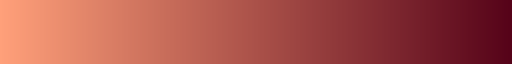

In [419]:
sns.color_palette("blend:#ffa07a,#cd5c5c", as_cmap=True) 
sns.color_palette("blend:#ffa07a,#800000", as_cmap=True) #560319
sns.color_palette("blend:#ffa07a,#560319", as_cmap=True)

C:\Users\anael\AppData\Local\Temp\ipykernel_39344\147352996.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Blues")  # ou "YlGn", "summer", etc.


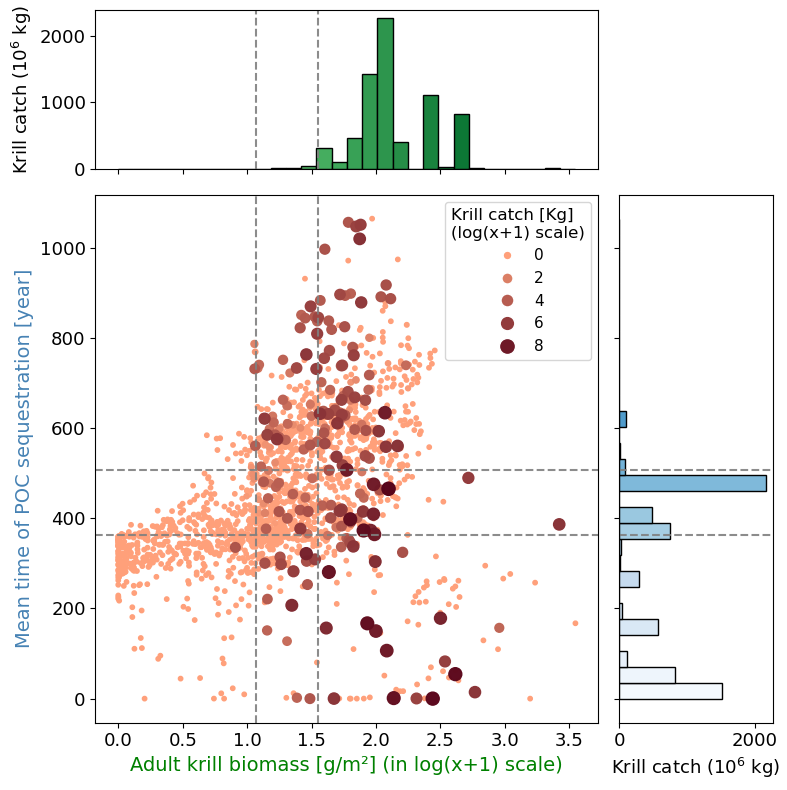

In [423]:
# Data prep
df = zones_catch.sort_values(by=['krill_greenweight_kg_log']).copy()
x = df["krill_adult_log"]
y = df["mean_seq_time"]
weights = df["krill_greenweight_kg"] / 1e6  # to plot in millions of kg

sizes = 10 + 80 * ((df['krill_greenweight_kg_log'] - df['krill_greenweight_kg_log'].min()) /
                   (df['krill_greenweight_kg_log'].max() - df['krill_greenweight_kg_log'].min()))

colors = df["krill_greenweight_kg_log"]

# Layout: Joint + Marginals
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4)
ax_joint = fig.add_subplot(gs[1:4, 0:3])
ax_marg_x = fig.add_subplot(gs[0, 0:3], sharex=ax_joint)
ax_marg_y = fig.add_subplot(gs[1:4, 3], sharey=ax_joint)

# Joint scatter plot
cmap_krill = sns.color_palette("blend:#ffa07a,#560319", as_cmap=True)
sc = ax_joint.scatter(x, y, c=colors, s=sizes, cmap=cmap_krill, alpha=0.99) # sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax_joint.set_xlabel("Adult krill biomass [g/m²] (in log(x+1) scale)", fontsize=14, color='green')
ax_joint.set_ylabel("Mean time of POC sequestration [year]", fontsize=14, color='steelblue')

ax_joint.axvline(x=1.070907, alpha = 0.9, color='grey', linestyle='--')
ax_joint.axvline(x=1.548244, alpha = 0.9, color='grey', linestyle='--')

ax_joint.axhline(y=361.922103, alpha = 0.9, color='grey', linestyle='--')
ax_joint.axhline(y=507.647916, alpha = 0.9, color='grey', linestyle='--')

ax_joint.tick_params(axis='both', labelsize=13)




# Marginal histogram on x-axis: weighted by krill catch
# ax_marg_x.hist(x, bins=30, weights=weights, color="gray", edgecolor='black')
# Définir le nombre de bins
n_bins = 30

# Générer les couleurs depuis une colormap
colors_x = plt.cm.Greens(np.linspace(0.3, 1, n_bins))  # dégradé du vert clair au foncé

# Calculer manuellement l'histogramme
hist_vals_x, bin_edges_x = np.histogram(x, bins=n_bins, weights=weights)

# Tracer chaque barre avec la bonne couleur
for i in range(n_bins):
    ax_marg_x.bar(
        (bin_edges_x[i] + bin_edges_x[i+1]) / 2,      # position x (centre de la barre)
        hist_vals_x[i],                               # hauteur
        width=bin_edges_x[i+1] - bin_edges_x[i],      # largeur du bin
        color=colors_x[i],
        edgecolor='black',
        align='center'
    )

ax_marg_x.set_ylabel('Krill catch ($10^6$ kg)', fontsize=13)
ax_marg_x.tick_params(labelbottom=False)

ax_marg_x.axvline(x=1.070907, alpha = 0.9, color='grey', linestyle='--')
ax_marg_x.axvline(x=1.548244, alpha = 0.9, color='grey', linestyle='--')

ax_marg_x.tick_params(axis='both', labelsize=13)




# Marginal histogram on y-axis: weighted by krill catch
# Définir les bins
bins = np.linspace(min(y), max(y), 31)
hist_vals, bin_edges = np.histogram(y, bins=bins, weights=weights)

# Colormap du vert clair au vert foncé
cmap = cm.get_cmap("Blues")  # ou "YlGn", "summer", etc.
norm = mcolors.Normalize(vmin=bin_edges[0], vmax=bin_edges[-1])

# Tracer les barres une par une avec couleur graduée
for i in range(len(hist_vals)):
    bar_color = cmap(norm((bin_edges[i] + bin_edges[i+1]) / 2))
    ax_marg_y.barh(
        y=(bin_edges[i] + bin_edges[i+1]) / 2,  # position au milieu du bin
        width=hist_vals[i],
        height=bin_edges[i+1] - bin_edges[i],
        color=bar_color,
        edgecolor='black'
    )
    
ax_marg_y.set_xlabel('Krill catch ($10^6$ kg)', fontsize=13)
ax_marg_y.tick_params(labelleft=False)

ax_marg_y.axhline(y=361.922103, alpha = 0.9, color='grey', linestyle='--')
ax_marg_y.axhline(y=507.647916, alpha = 0.9, color='grey', linestyle='--')

ax_marg_y.tick_params(axis='both', labelsize=13)

# Colorbar
# cbar = fig.colorbar(sc, ax=ax_joint, orientation='vertical', pad=0.02)
# cbar.set_label("log(Krill greenweight)", fontsize=11)

plt.tight_layout()



######## ctach legend 
# 1. Utiliser la même normalisation que pour le scatter
norm = mcolors.Normalize(vmin=df['krill_greenweight_kg_log'].min(),
                         vmax=df['krill_greenweight_kg_log'].max())

# 3. Définir les valeurs représentatives que tu veux dans la légende
legend_vals = [0, 2, 4, 6, 8]  # log(Kg)

# 4. Créer les bulles de légende
legend_handles = []
for val in legend_vals:
    size = 40 + 110 * ((val - df['krill_greenweight_kg_log'].min()) /
                      (df['krill_greenweight_kg_log'].max() - df['krill_greenweight_kg_log'].min()))
    color = cmap_krill(norm(val))
    handle = plt.Line2D([], [], marker='o', linestyle='None',
                        markersize= np.sqrt(size), # sqrt because size in scatter is area
                        markerfacecolor=color,
                        markeredgecolor='white',
                        label=f"{val}")
    legend_handles.append(handle)

# 5. Ajouter la légende au plot principal
ax_joint.legend(handles=legend_handles,
                title="Krill catch [Kg]\n(log(x+1) scale)",
                loc='upper right',
                fontsize=11,
                title_fontsize=12,
                frameon=True)


# plt.savefig('./figures/biplot_fishing_histocolors.png',bbox_inches='tight', dpi=300)
plt.show()


In [309]:
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.cm as cm

C:\Users\anael\AppData\Local\Temp\ipykernel_39344\2654213883.py:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = g._legend.legendHandles, [t.get_text() for t in g._legend.texts]


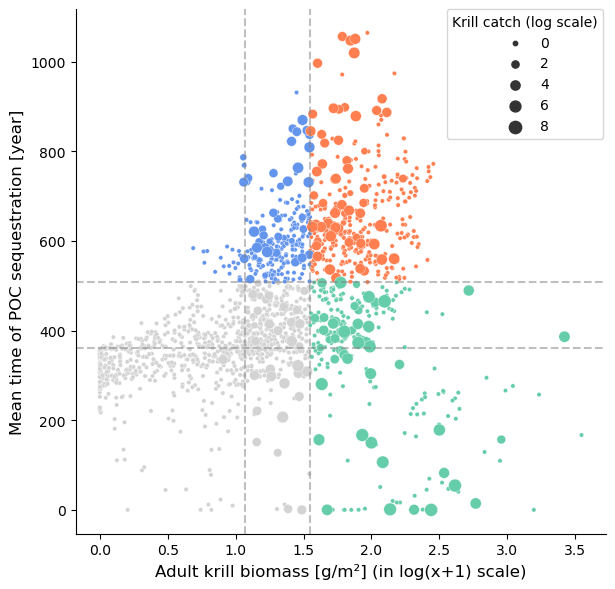

In [212]:
g=sns.relplot(x="krill_adult_log", y="mean_seq_time", 
            data=zones_catch.sort_values(by=['krill_greenweight_kg_log']),
            hue='Zone_type', 
            size = 'krill_greenweight_kg_log',
            #style="krill_catch_density_log",
            palette = ['lightgrey', 'cornflowerblue', 'mediumaquamarine', 'coral'], #sns.cubehelix_palette(rot=-.2, as_cmap=True),
           sizes = (10,90),
           label='krill catch density (log scale)', legend=True,
              height=6, aspect=0.8)


# Step 1: Get all legend entries (handles + labels)
handles, labels = g._legend.legendHandles, [t.get_text() for t in g._legend.texts]

# Step 2: Keep only the size legend entries
# Find where size legend starts (after all Zone_type labels)
size_start = labels.index("krill_greenweight_kg_log")

# Step 3: Keep only the size-related entries
new_handles = handles[size_start + 1:]  # skip the variable name
new_labels = labels[size_start + 1:]    # skip the variable name


# Step 4: Remove existing legend, and add a new one with only size info
g._legend.remove()
g.ax.legend(new_handles, new_labels, title="Krill catch (log scale)", bbox_to_anchor=(0.7, 1), borderaxespad=0.)


plt.axvline(x=1.070907, alpha = 0.5, color='grey', linestyle='--')
plt.axvline(x=1.548244, alpha = 0.5, color='grey', linestyle='--')

plt.axhline(y=361.922103, alpha = 0.5, color='grey', linestyle='--')
plt.axhline(y=507.647916, alpha = 0.5, color='grey', linestyle='--')


plt.xlabel('Adult krill biomass [g/m²] (in log(x+1) scale)', fontsize = 'large')
plt.ylabel('Mean time of POC sequestration [year]', fontsize = 'large')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# plt.text(3.8, 200, '--- :  1/3 quantiles')

plt.tight_layout()
# plt.savefig('./figures/biplot_fishing_colors.png',bbox_inches='tight', dpi=300)

plt.show()

# Key numbers

- total amount of krill catch
- mean density of krill catch
- amount of krill catch in each zone type
- % of catch taken in each zone type

# Area calculation

- Area of the fishing ground total and for each period
- Area of the overlap of each zone type with fishing

In [214]:
# load area file from OCIM
OCIM = xr.open_dataset('./outputs_formated_data/fseq_OCIM2_48L_interpolated_SO.nc')

# transform area array into a dataframe and crop the file à -45°S
area_df = OCIM[['AREA', 'MASK']].isel(depth=0).to_dataframe().drop(['depth'], axis = 1).reset_index()
area_df = area_df[area_df['latitude'] <=-45].set_index(['latitude', 'longitude'])

## calculate the area of the ocean (remove land) => multiply be the proportion of the ocean in cell (= MASK : 1=ocean, 0=land, or %o each)
area_df['True_area'] = area_df['AREA']*area_df['MASK']
area_df # 3240  rows

AREA      MASK     True_area
latitude longitude                                      
-79      -179.0     9.332850e+09  0.061111  5.703408e+08
         -177.0     9.332850e+09  0.061111  5.703408e+08
         -175.0     9.332850e+09  0.061111  5.703408e+08
         -173.0     9.332850e+09  0.061111  5.703408e+08
         -171.0     9.332850e+09  0.061111  5.703408e+08
...                          ...       ...           ...
-45       171.0     3.458337e+10  0.750000  2.593752e+10
          173.0     3.458337e+10  1.000000  3.458337e+10
          175.0     3.458337e+10  1.000000  3.458337e+10
          177.0     3.458337e+10  1.000000  3.458337e+10
          179.0     3.458337e+10  1.000000  3.458337e+10

[3240 rows x 3 columns]

### Area of fishing grounds

In [215]:
# load the catch data 
catch = pd.read_csv('./outputs_formated_data/Krill_catch_final.csv').set_index(['latitude', 'longitude']).dropna()
catch_p1 = pd.read_csv('./outputs_formated_data/Krill_catch_final_1.csv').set_index(['latitude', 'longitude']).dropna()
catch_p2 = pd.read_csv('./outputs_formated_data/Krill_catch_final_2.csv').set_index(['latitude', 'longitude']).dropna()
catch_p3 = pd.read_csv('./outputs_formated_data/Krill_catch_final_3.csv').set_index(['latitude', 'longitude']).dropna()

In [216]:
#join the areas
catch = catch.join(area_df , how='left')
catch_p1 = catch_p1.join(area_df , how='left')
catch_p2 = catch_p2.join(area_df , how='left')
catch_p3 = catch_p3.join(area_df , how='left')

# sum the area to get the total area fished in eahc period
tot_area_fished  = catch.sum()['True_area']*0.000001 # 4,920,658.035727942 km²
area_fished1 = catch_p1.sum()['True_area']*0.000001 # 4,600,054.005471619 km²
area_fished2 = catch_p2.sum()['True_area']*0.000001 # 1,034,650.1718364782 km²
area_fished3 = catch_p3.sum()['True_area']*0.000001 # 1,012,877.9730397434 km²

In [217]:
print(tot_area_fished, area_fished1, area_fished2, area_fished3)

4920658.035727942 4600054.005471619 1126312.665321143 967017.3418954515


In [389]:
catchall = catch.sum()['krill_greenweight_kg']/1000 # tons
catchp1 = catch_p1.sum()['krill_greenweight_kg']/1000 # tons
catchp2 = catch_p2.sum()['krill_greenweight_kg']/1000 # tons
catchp3 = catch_p3.sum()['krill_greenweight_kg']/1000 # tons

print(catchall, catchp1, catchp2, catchp3)

<xarray.DataArray 'krill_greenweight_kg' ()>
array(7672510.45068033) 2354474.0521344 1558177.5490239996 3759858.8495219327


In [388]:
catchp3

3759858849.5219326

### Fishing area in each zone type

How the catch are spread among the 3 identified zone types.

In [218]:
zones

,latitude,longitude,label_grid,mean_seq_time,krill_adult_log,Upper_tiertile_seq,Upper_tiertile_krill,Zone_type
0,-75,-179,0.0,646.910548,1.08086,1.0,0.0,1.0
1,-75,-177,0.0,601.882341,1.38079,1.0,0.0,1.0
2,-75,-175,0.0,655.238074,1.51197,1.0,0.0,1.0
3,-75,-173,0.0,641.075711,1.53273,1.0,0.0,1.0
4,-75,-171,0.0,620.753036,1.70495,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...
2642,-47,65,0.0,298.907285,0.47365,0.0,0.0,0.0
2643,-47,67,0.0,45.645605,0.63506,0.0,0.0,0.0
2644,-47,69,0.0,44.367955,0.48378,0.0,0.0,0.0
2645,-47,71,0.0,88.203798,0.31010,0.0,0.0,0.0


In [219]:
zones_catch = pd.merge(zones, catch.reset_index().drop(['AREA', 'MASK', 'True_area'], axis=1), on = ['latitude', 'longitude'], how='right').set_index(['latitude', 'longitude'])
zones_catch = zones_catch.join(other = area_df, how = 'left')

zones_catchp1 = pd.merge(zones, catch_p1.reset_index().drop(['AREA', 'MASK', 'True_area'], axis=1), on = ['latitude', 'longitude'], how='right').set_index(['latitude', 'longitude'])
zones_catchp1 = zones_catchp1.join(other = area_df, how = 'left')

zones_catchp2 = pd.merge(zones, catch_p2.reset_index().drop(['AREA', 'MASK', 'True_area'], axis=1), on = ['latitude', 'longitude'], how='right').set_index(['latitude', 'longitude'])
zones_catchp2 = zones_catchp2.join(other = area_df, how = 'left')

zones_catchp3 = pd.merge(zones, catch_p3.reset_index().drop(['AREA', 'MASK', 'True_area'], axis=1), on = ['latitude', 'longitude'], how='right').set_index(['latitude', 'longitude'])
zones_catchp3 = zones_catchp3.join(other = area_df, how = 'left')

### Krill catch distribution in time seq and krill densities

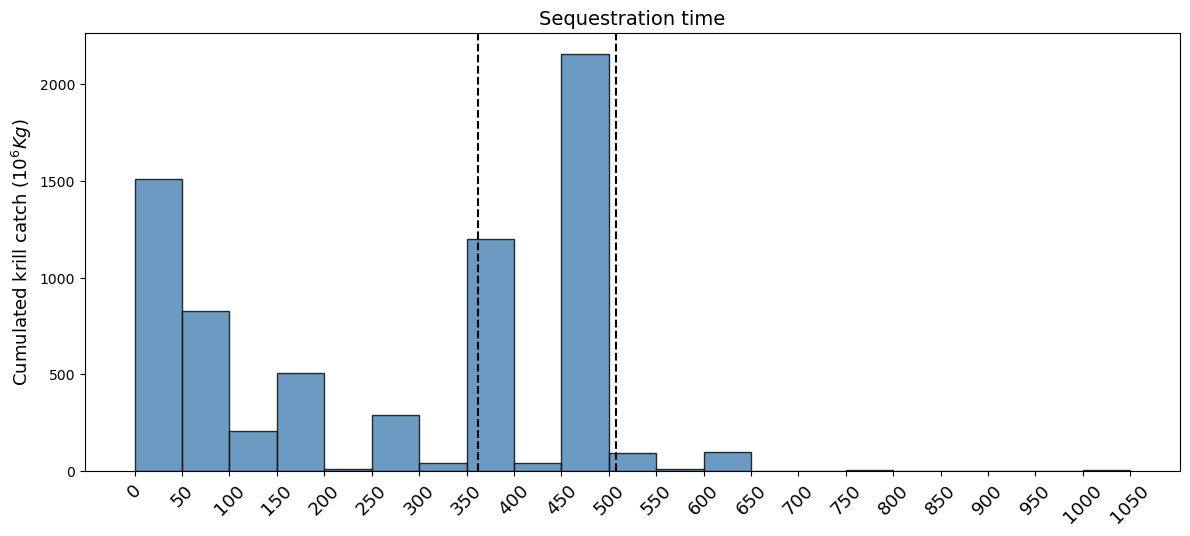

In [236]:
# Créer les subplots
fig, axes = plt.subplots(2,1 , figsize=(12, 10), sharex=True)
bins = list(range(0, 1100, 50))

# all years time seq
axes[1].hist(zones_catch['mean_seq_time'], bins=bins, weights=zones_catch['krill_greenweight_kg']/1000000,
             color='steelblue', edgecolor='black', alpha=0.8)

axes[1].axvline(x=361.922103, color='black', linestyle='--', linewidth=1.5) 
axes[1].axvline(x=507.647916, color='black', linestyle='--', linewidth=1.5) 

axes[1].set_title('Sequestration time', fontsize=14)
axes[1].set_ylabel('Cumulated krill catch ($10^6 Kg$)', fontsize=13)

plt.xticks(bins, rotation=45, fontsize=13)

axes[0].remove()
plt.tight_layout()
# plt.savefig('./figures/histo_catch_tseq.png', bbox_inches='tight', dpi=300)

plt.show()

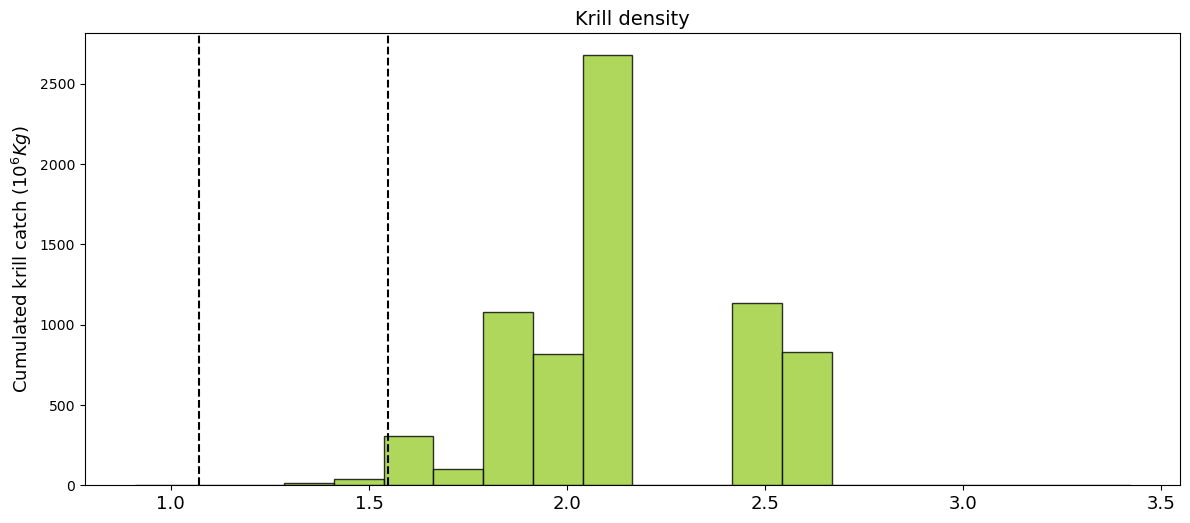

In [233]:
# Créer les subplots
fig, axes = plt.subplots(2,1 , figsize=(12, 10), sharex=True)
# bins = list(range(0, 1100, 50))

# all years krill density
axes[1].hist(zones_catch['krill_adult_log'], bins=20, weights=zones_catch['krill_greenweight_kg']/1000000,
             color='yellowgreen', edgecolor='black', alpha=0.8)

axes[1].axvline(x=1.070907, color='black', linestyle='--', linewidth=1.5) 
axes[1].axvline(x=1.548244, color='black', linestyle='--', linewidth=1.5)  

axes[1].set_title('Krill density', fontsize=14)
axes[1].set_ylabel('Cumulated krill catch ($10^6 Kg$)', fontsize=13)

plt.xticks(fontsize=13)

axes[0].remove()
plt.tight_layout()
# plt.savefig('./figures/histo_catch_tseq.png', bbox_inches='tight', dpi=300)

plt.show()


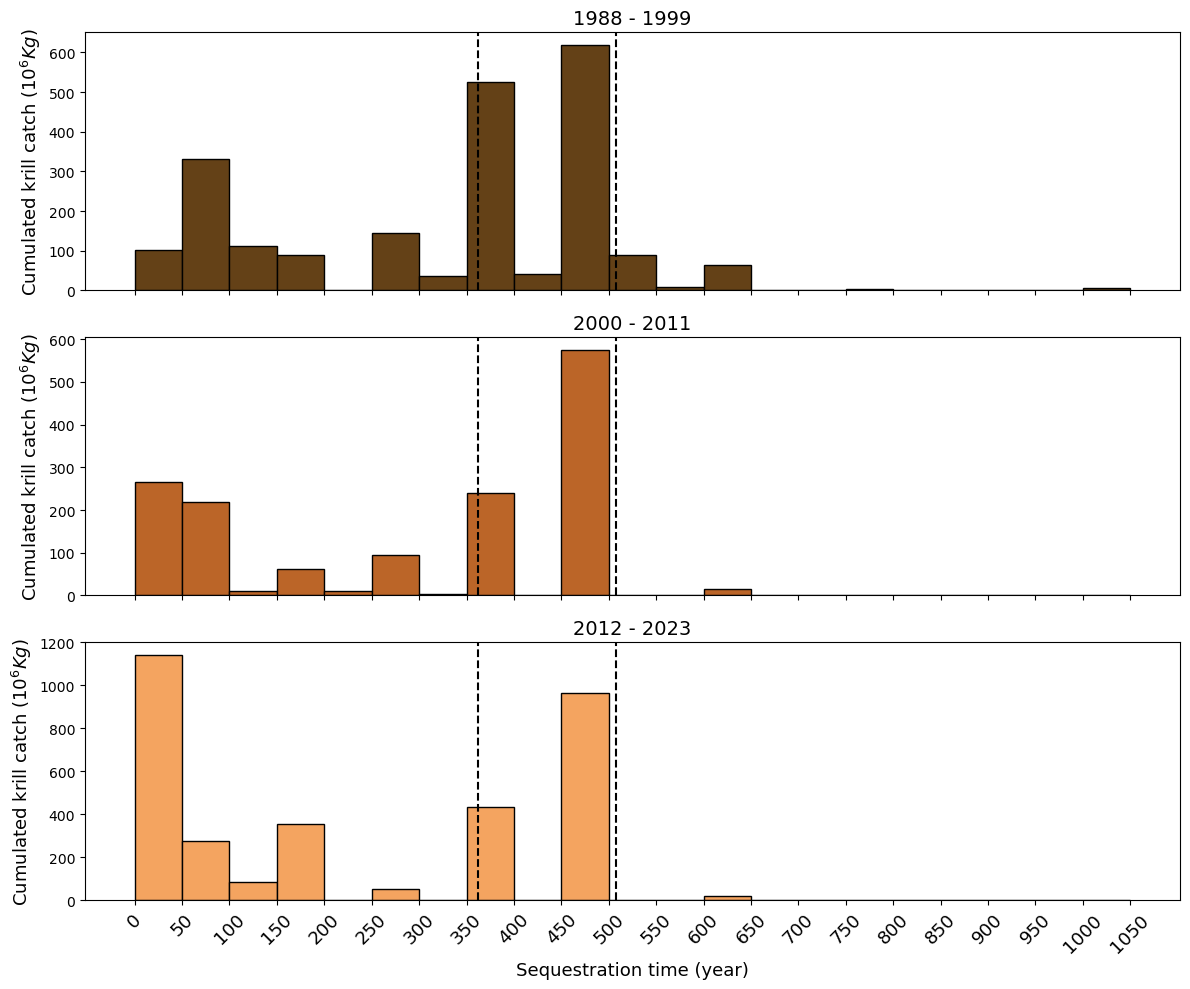

In [167]:
# Créer les subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
bins = list(range(0, 1100, 50))

# Period 1
axes[0].hist(zones_catchp1['mean_seq_time'], bins=bins, weights=zones_catchp1['krill_greenweight_kg']/1000000,
             color='#644117', edgecolor='black')

axes[0].axvline(x=361.922103, color='black', linestyle='--', linewidth=1.5) 
axes[0].axvline(x=507.647916, color='black', linestyle='--', linewidth=1.5)  

axes[0].set_title('1988 - 1999', fontsize=14)
axes[0].set_ylabel('Cumulated krill catch ($10^6 Kg$)', fontsize=13)

# Period 2
axes[1].hist(zones_catchp2['mean_seq_time'], bins=bins, weights=zones_catchp2['krill_greenweight_kg']/1000000,
             color='#bb6528', edgecolor='black')
axes[1].axvline(x=361.922103, color='black', linestyle='--', linewidth=1.5) 
axes[1].axvline(x=507.647916, color='black', linestyle='--', linewidth=1.5)  

axes[1].set_title('2000 - 2011', fontsize=14)
axes[1].set_ylabel('Cumulated krill catch ($10^6 Kg$)', fontsize=13)

# Period 3
axes[2].hist(zones_catchp3['mean_seq_time'], bins=bins, weights=zones_catchp3['krill_greenweight_kg']/1000000,
             color='#f4a460', edgecolor='black')
axes[2].axvline(x=361.922103, color='black', linestyle='--', linewidth=1.5) 
axes[2].axvline(x=507.647916, color='black', linestyle='--', linewidth=1.5)  

axes[2].set_title('2012 - 2023', fontsize=14)
axes[2].set_ylabel('Cumulated krill catch ($10^6 Kg$)', fontsize=13)
axes[2].set_xlabel('Sequestration time (year)', fontsize=13)

# Axe x : ticks et mise en forme
plt.xticks(bins, rotation=45, fontsize=13)
plt.tight_layout()
plt.savefig('./figures/histo_catch_tseq.png', bbox_inches='tight', dpi=300)

plt.show()

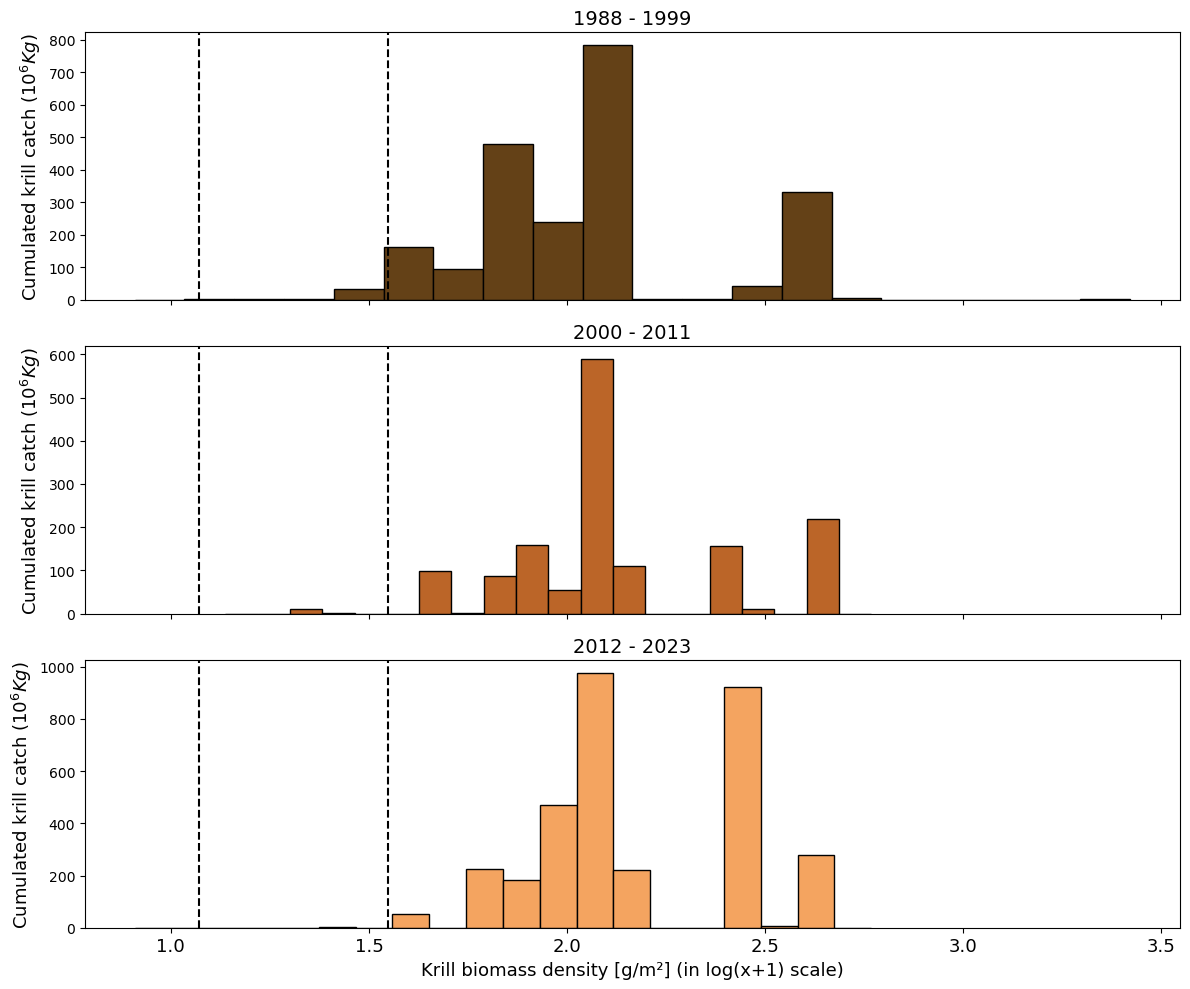

In [168]:
# Créer les subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
# bins = list(np.linspace(1, 3.5, 35))

# Period 1
axes[0].hist(zones_catchp1['krill_adult_log'], bins=20, weights=zones_catchp1['krill_greenweight_kg']/1000000,
             color='#644117', edgecolor='black')
axes[0].axvline(x=1.070907, color='black', linestyle='--', linewidth=1.5) 
axes[0].axvline(x=1.548244, color='black', linestyle='--', linewidth=1.5)  

axes[0].set_title('1988 - 1999', fontsize=14)
axes[0].set_ylabel('Cumulated krill catch ($10^6 Kg$)', fontsize=13)

# Period 2
axes[1].hist(zones_catchp2['krill_adult_log'], bins=20, weights=zones_catchp2['krill_greenweight_kg']/1000000,
             color='#bb6528', edgecolor='black')
axes[1].axvline(x=1.070907, color='black', linestyle='--', linewidth=1.5) 
axes[1].axvline(x=1.548244, color='black', linestyle='--', linewidth=1.5)  

axes[1].set_title('2000 - 2011', fontsize=14)
axes[1].set_ylabel('Cumulated krill catch ($10^6 Kg$)', fontsize=13)

# Period 3
axes[2].hist(zones_catchp3['krill_adult_log'], bins=20, weights=zones_catchp3['krill_greenweight_kg']/1000000,
             color='#f4a460', edgecolor='black')
axes[2].axvline(x=1.070907, color='black', linestyle='--', linewidth=1.5) 
axes[2].axvline(x=1.548244, color='black', linestyle='--', linewidth=1.5)  

axes[2].set_title('2012 - 2023', fontsize=14)
axes[2].set_ylabel('Cumulated krill catch ($10^6 Kg$)', fontsize=13)
axes[2].set_xlabel('Krill biomass density [g/m²] (in log(x+1) scale)', fontsize=13)

# Axe x : ticks et mise en forme
plt.xticks(fontsize=13)
plt.tight_layout()
plt.savefig('./figures/histo_catch_krill.png', bbox_inches='tight', dpi=300)

plt.show()

### Area of the fished zones per category

In [237]:
area_allcatch = zones_catch.groupby(['Zone_type'])[['True_area']].sum()
areas_p1 = zones_catchp1.groupby(['Zone_type'])[['True_area']].sum()
areas_p2 = zones_catchp2.groupby(['Zone_type'])[['True_area']].sum()
areas_p3 = zones_catchp3.groupby(['Zone_type'])[['True_area']].sum()

In [238]:
area_allcatch['Period'] = 'all_years'
areas_p1['Period'] = 'period_1'
areas_p2['Period'] = 'period_2'
areas_p3['Period'] = 'period_3'

In [239]:
display(area_allcatch,
areas_p1,
areas_p2,
areas_p3)

,True_area,Period
Zone_type,,
0.0,1.047517e+12,all_years
1.0,1.096673e+12,all_years
2.0,1.156875e+12,all_years
3.0,1.459428e+12,all_years


,True_area,Period
Zone_type,,
0.0,9.222511e+11,period_1
1.0,1.052264e+12,period_1
2.0,1.050356e+12,period_1
3.0,1.415019e+12,period_1


,True_area,Period
Zone_type,,
0.0,2.388147e+11,period_2
2.0,6.269540e+11,period_2
3.0,2.088856e+11,period_2


,True_area,Period
Zone_type,,
0.0,1.599274e+11,period_3
1.0,1.286251e+11,period_3
2.0,4.508622e+11,period_3
3.0,1.759444e+11,period_3


### Amount of krill caught in each category

In [240]:
krill_catch_allcatch = zones_catch.groupby(['Zone_type'])[['krill_greenweight_kg']].sum()
krill_catch_p1 = zones_catchp1.groupby(['Zone_type'])[['krill_greenweight_kg']].sum()
krill_catch_p2 = zones_catchp2.groupby(['Zone_type'])[['krill_greenweight_kg']].sum()
krill_catch_p3 = zones_catchp3.groupby(['Zone_type'])[['krill_greenweight_kg']].sum()

krill_catch_allcatch['tot_catch'] = zones_catch['krill_greenweight_kg'].sum()
krill_catch_p1['tot_catch'] = zones_catchp1['krill_greenweight_kg'].sum()
krill_catch_p2['tot_catch'] = zones_catchp2['krill_greenweight_kg'].sum()
krill_catch_p3['tot_catch'] = zones_catchp3['krill_greenweight_kg'].sum()

krill_catch_allcatch['prop_catch'] = krill_catch_allcatch['krill_greenweight_kg']/krill_catch_allcatch['tot_catch']
krill_catch_p1['prop_catch'] = krill_catch_p1['krill_greenweight_kg']/krill_catch_p1['tot_catch']
krill_catch_p2['prop_catch'] = krill_catch_p2['krill_greenweight_kg']/krill_catch_p2['tot_catch']
krill_catch_p3['prop_catch'] = krill_catch_p3['krill_greenweight_kg']/krill_catch_p3['tot_catch']

In [241]:
krill_catch_allcatch['Period'] = 'all_years'
krill_catch_p1['Period'] = 'period_1'
krill_catch_p2['Period'] = 'period_2'
krill_catch_p3['Period'] = 'period_3'

In [242]:
display(krill_catch_allcatch,
krill_catch_p1,
krill_catch_p2,
krill_catch_p3)

,krill_greenweight_kg,tot_catch,prop_catch,Period
Zone_type,,,,
0.0,4.611513e+07,7.672510e+09,0.006010,all_years
1.0,8.278759e+06,7.672510e+09,0.001079,all_years
2.0,6.842419e+09,7.672510e+09,0.891810,all_years
3.0,1.179538e+08,7.672510e+09,0.015374,all_years


,krill_greenweight_kg,tot_catch,prop_catch,Period
Zone_type,,,,
0.0,3.231979e+07,2.354474e+09,0.013727,period_1
1.0,8.024368e+06,2.354474e+09,0.003408,period_1
2.0,2.059885e+09,2.354474e+09,0.874881,period_1
3.0,7.923727e+07,2.354474e+09,0.033654,period_1


,krill_greenweight_kg,tot_catch,prop_catch,Period
Zone_type,,,,
0.0,1.230820e+07,1.558178e+09,0.007899,period_2
2.0,1.468856e+09,1.558178e+09,0.942676,period_2
3.0,1.773637e+07,1.558178e+09,0.011383,period_2


,krill_greenweight_kg,tot_catch,prop_catch,Period
Zone_type,,,,
0.0,1.487147e+06,3.759859e+09,0.000396,period_3
1.0,2.543915e+05,3.759859e+09,0.000068,period_3
2.0,3.313678e+09,3.759859e+09,0.881330,period_3
3.0,2.098014e+07,3.759859e+09,0.005580,period_3


## missing catch : cells for which we don't have time seq or krill pop data (so no category assigned) but which exist in the catch record

= 14 cells, representing 160164 km² and 657743.5 tones of krill caught.

In [243]:
missing_catch = zones_catch[zones_catch['Zone_type'].isna()]
print(missing_catch['True_area'].sum()*0.000001)
print(missing_catch['krill_greenweight_kg'].sum()*0.001)

160164.43814199095
657743.5104378496


# plot

tornado chart of the % of cactch taken in each zone type and the overlap area between fishing ground and each zones type for each period > show the evolution

In [244]:
# modify data
area_allcatch.reset_index(inplace=True)
areas_p1.reset_index(inplace=True)
areas_p2.reset_index(inplace=True)
areas_p3.reset_index(inplace=True)

krill_catch_allcatch = krill_catch_allcatch[['prop_catch', 'krill_greenweight_kg', 'Period']].reset_index()
krill_catch_p1 = krill_catch_p1[['prop_catch', 'krill_greenweight_kg', 'Period']].reset_index()
krill_catch_p2 = krill_catch_p2[['prop_catch', 'krill_greenweight_kg', 'Period']].reset_index()
krill_catch_p3 = krill_catch_p3[['prop_catch', 'krill_greenweight_kg', 'Period']].reset_index()

In [245]:
# comine period in one df
areas_overlap_fising = pd.concat([area_allcatch, areas_p1, areas_p2, areas_p3])
prop_catch = pd.concat([krill_catch_allcatch, krill_catch_p1, krill_catch_p2, krill_catch_p3])

In [246]:
# combine areas overlapped and catch prop based on period and Zone type
data_tornado = areas_overlap_fising.merge(prop_catch, on = ['Zone_type', 'Period'], how='outer')

In [247]:
data_tornado['True_area_norm'] = data_tornado['True_area']*(0.000001*0.000001)  # 10e12 m² = 10e6 km² , a million of km²
data_tornado['krill_greenweight_norm'] = data_tornado['krill_greenweight_kg']*0.001*0.000001 # millions of tons
data_tornado['prop_catch_norm'] = data_tornado['prop_catch']  

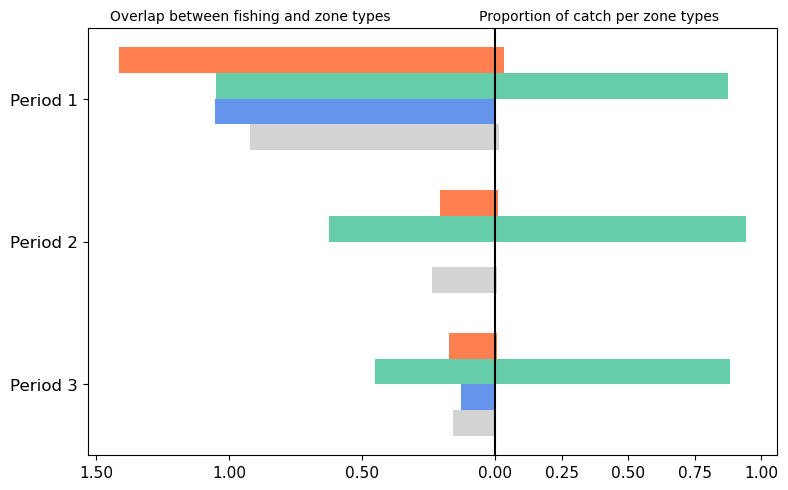

In [255]:
# Couleurs
zone_colors = {
    0: 'lightgrey',
    1: 'cornflowerblue',
    2: 'mediumaquamarine',
    3: 'coral'
}

# Setup du graphique
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.18
periods = ["period_1", "period_2", "period_3"] # + "all_years" ?
zone_types = sorted(data_tornado['Zone_type'].unique(), reverse=True)
y_pos = np.arange(len(periods))

# Boucle par Zone_type
for i, zt in enumerate(zone_types):
    for j, period in enumerate(periods):
        subset = data_tornado[(data_tornado['Zone_type'] == zt) & (data_tornado['Period'] == period)]
        if subset.empty:
            continue

        # Index vertical ajusté par zone
        y = j + (i - 1.5) * bar_width

        # Gauche : True_area (négatif pour barre à gauche, mais valeur positive en label)
        ax.barh(y, -subset['True_area_norm'].values[0],
                height=bar_width, color=zone_colors[zt])

        # Droite : prop_catch
        ax.barh(y, subset['prop_catch_norm'].values[0],
                height=bar_width, color=zone_colors[zt])

# Axe central
ax.axvline(0, color='black')

# Y ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(["Period 1", "Period 2", "Period 3"], fontsize=12)
ax.invert_yaxis()

# Convert x-tick labels to absolute values
x_ticks = np.array([ -1.5, -1 , -0.5,  0 , 0.25,  0.5, 0.75, 1. ]) #ax.get_xticks()
ax.set_xticks(x_ticks)  # Explicitly set the ticks
ax.set_xticklabels([f"{abs(x):.2f}" for x in x_ticks], fontsize=11)

plt.text(-1.45, -0.55, 'Overlap between fishing and zone types', fontsize=10)
plt.text(-0.06, -0.55, 'Proportion of catch per zone types', fontsize=10)

# Légende
# from matplotlib.patches import Patch
# legend_patches = [Patch(color=zone_colors[z], label=f'Zone type {int(z)}') for z in zone_types]
# ax.legend(handles=legend_patches, loc='lower left', fontsize=14)

plt.tight_layout()


# plt.savefig('./figures/tornadoplot_fishing.png',bbox_inches='tight', dpi=300)

plt.show()

In [249]:
data_tornado.iloc[8:11]

,Zone_type,True_area,Period,prop_catch,krill_greenweight_kg,True_area_norm,krill_greenweight_norm,prop_catch_norm
8,0.0,2.388147e+11,period_2,0.007899,1.230820e+07,0.238815,0.012308,0.007899
9,2.0,6.269540e+11,period_2,0.942676,1.468856e+09,0.626954,1.468856,0.942676
10,3.0,2.088856e+11,period_2,0.011383,1.773637e+07,0.208886,0.017736,0.011383


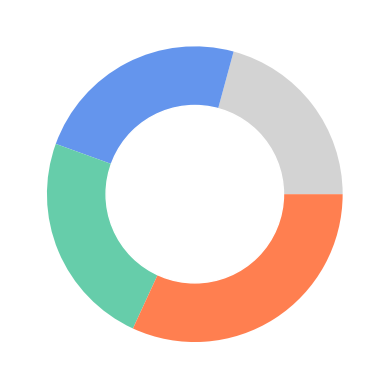

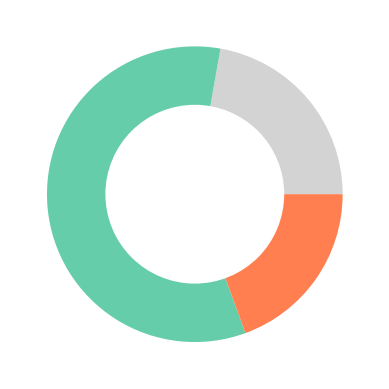

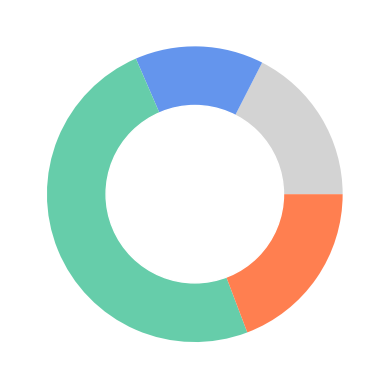

In [259]:
# period 1
data_tornado['True_area_norm'].iloc[4:8].plot.pie(labels=['', '', '', '',''], colors = ['lightgrey','cornflowerblue','mediumaquamarine','coral'], ylabel='')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# plt.savefig('./figures/donut_overlap_distrib_p1.png', bbox_inches = 'tight', dpi=300)
plt.show()

#period 2
data_tornado['True_area_norm'].iloc[8:11].plot.pie(labels=['', '', '', '',''], colors = ['lightgrey','mediumaquamarine','coral'], ylabel='')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# plt.savefig('./figures/donut_overlap_distrib_p2.png', bbox_inches = 'tight', dpi=300)
plt.show()

# period 3
data_tornado['True_area_norm'].iloc[11:].plot.pie(labels=['', '', '', '',''], colors = ['lightgrey','cornflowerblue','mediumaquamarine','coral'], ylabel='')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# plt.savefig('./figures/donut_overlap_distrib_p3.png', bbox_inches = 'tight', dpi=300)
plt.show()

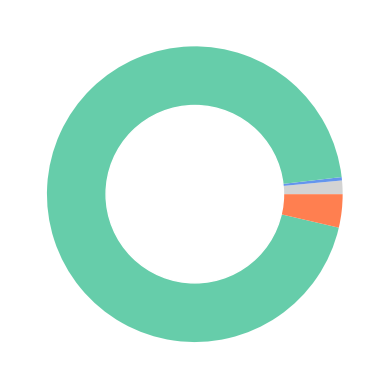

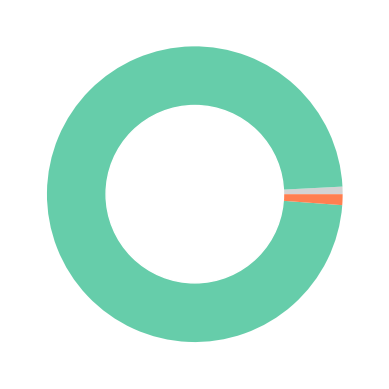

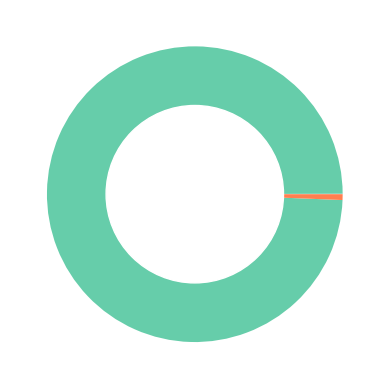

In [257]:
# period 1
data_tornado['prop_catch'].iloc[4:8].plot.pie(labels=['', '', '', '',''], colors = ['lightgrey','cornflowerblue','mediumaquamarine','coral'], ylabel='')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# plt.savefig('./figures/donut_catch_distrib_p1.png', bbox_inches = 'tight', dpi=300)
plt.show()

#period 2
data_tornado['prop_catch'].iloc[8:11].plot.pie(labels=['', '', '', '',''], colors = ['lightgrey','mediumaquamarine','coral'], ylabel='')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# plt.savefig('./figures/donut_catch_distrib_p2.png', bbox_inches = 'tight', dpi=300)
plt.show()

# period 3
data_tornado['prop_catch'].iloc[11:].plot.pie(labels=['', '', '', '',''], colors = ['lightgrey','cornflowerblue','mediumaquamarine','coral'], ylabel='')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# plt.savefig('./figures/donut_catch_distrib_p3.png', bbox_inches = 'tight', dpi=300)
plt.show()

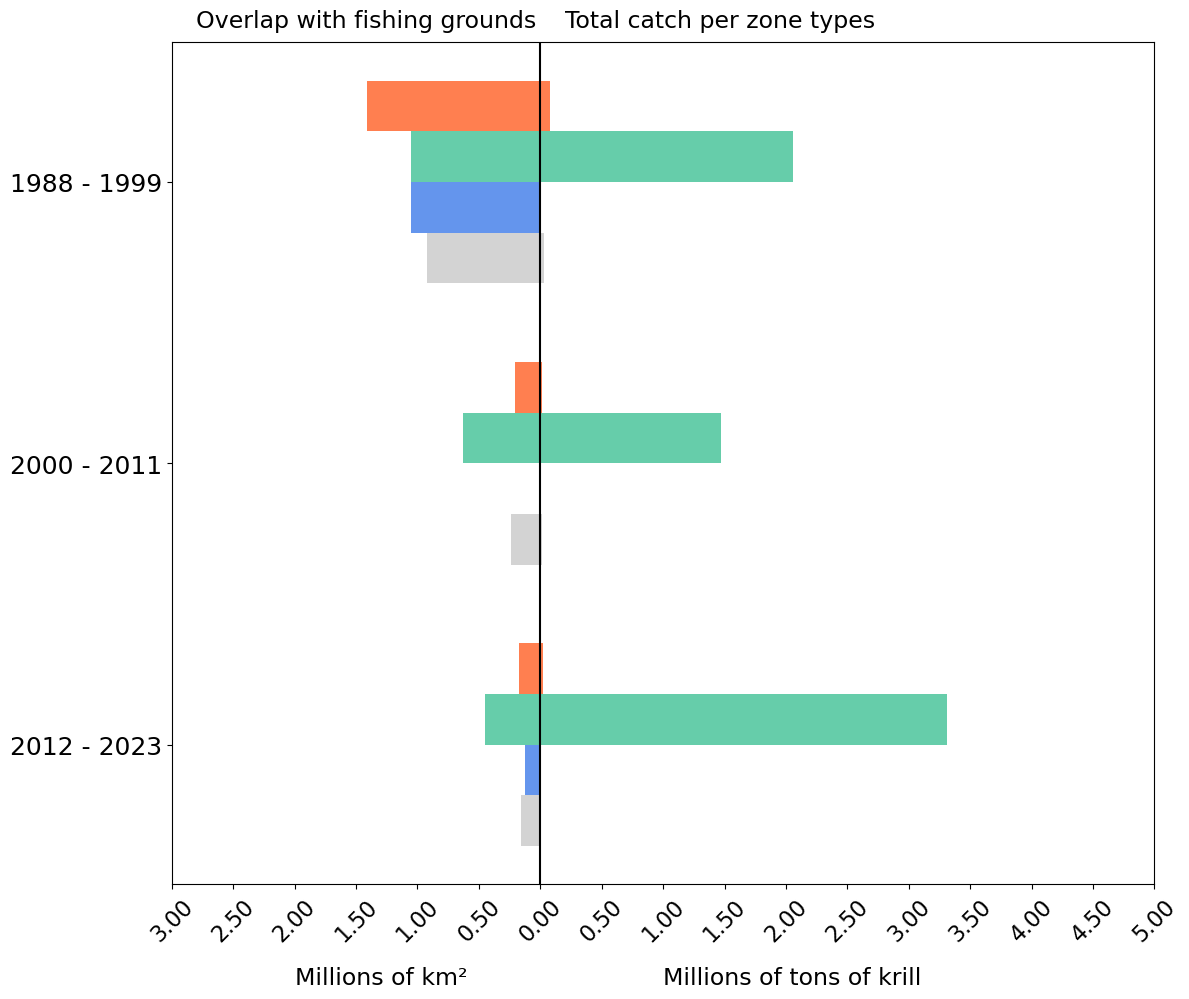

In [384]:
# Couleurs
zone_colors = {
    0: 'lightgrey',
    1: 'cornflowerblue',
    2: 'mediumaquamarine',
    3: 'coral'
}

# Setup du graphique
fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.18
periods = ["period_1", "period_2", "period_3"] # + "all_years" ?
zone_types = sorted(data_tornado['Zone_type'].unique(), reverse=True)
y_pos = np.arange(len(periods))

# Boucle par Zone_type
for i, zt in enumerate(zone_types):
    for j, period in enumerate(periods):
        subset = data_tornado[(data_tornado['Zone_type'] == zt) & (data_tornado['Period'] == period)]
        if subset.empty:
            continue

        # Index vertical ajusté par zone
        y = j + (i - 1.5) * bar_width

        # Gauche : True_area (négatif pour barre à gauche, mais valeur positive en label)
        ax.barh(y, -subset['True_area_norm'].values[0],
                height=bar_width, color=zone_colors[zt])

        # Droite : prop_catch
        ax.barh(y, subset['krill_greenweight_norm'].values[0],
                height=bar_width, color=zone_colors[zt])

# Axe central
ax.axvline(0, color='black')

# Y ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(["1988 - 1999", "2000 - 2011", "2012 - 2023"], fontsize=18)
ax.invert_yaxis()

# Convert x-tick labels to absolute values
x_ticks = np.array([-3, -2.5,-2, -1.5, -1 , -0.5,  0 , 0.5, 1. , 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]) #ax.get_xticks()
ax.set_xticks(x_ticks)  # Explicitly set the ticks
ax.set_xticklabels([f"{abs(x):.2f}" for x in x_ticks], fontsize=16, rotation=45)

plt.text(-2.8, -0.55, 'Overlap with fishing grounds ', fontsize=17)
plt.text(0.2, -0.55, 'Total catch per zone types ', fontsize=17)

plt.text(-2, 2.85, 'Millions of km²', fontsize=17)
plt.text(1, 2.85, 'Millions of tons of krill', fontsize=17)

# Légende
# from matplotlib.patches import Patch
# legend_patches = [Patch(color=zone_colors[z], label=f'Zone type {int(z)}') for z in zone_types]
# ax.legend(handles=legend_patches, loc='lower left', fontsize=14)

plt.tight_layout()


# plt.savefig('./figures/tornadoplot_fishing_totcatch.png',bbox_inches='tight', dpi=300)

plt.show()